## Practical work 1. Linear models!!!

**Last updated <font color='red'> 10.02.2024</font>**

Let's start by downloading the necessary libraries and functions.

In [1]:
# Library for working with matrices
import numpy as np
# Library for working with datasets
import pandas as pd
# Linear algebra algorithms
import scipy.linalg as sla
# Graphics library
import matplotlib.pyplot as plt
# Allows you to draw graphs and images directly on your laptop, rather than in a separate window.
%matplotlib inline
# Fix the seed and the random state
seed=42
random_state=42

# 1. Supervised Learning

This is an introductory section. The content presented here is fundamental and provided for those who may not be familiar with it yet. For the first problem, you can proceed to **Section 2**.

First, let's get acquainted  with the basic **fit-predict** interface for ML models. Here we study **supervised learning**.

Roughly speaking, we need 3 things:


## 1.1 **Dataset** =  what we are studying.


The samples in a dataset are pairs $(x_1, y_1), \dots (x_n, y_n)$. Here is the simpliest example:


In [2]:
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
# load the dataset
df = pd.read_csv(url, header=None)
# summarize shape
print(df.shape)

(63, 2)


This dataset is known as the **Auto Insurance Regression Dataset**, where we aim to predict the payment based on the number of claims for a Swedish car.

In [3]:
df.rename(columns={0: 'Claim', 1: 'Price'}, inplace=True)
df

,Claim,Price
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


What do we have here? It looks like a 63x2 matrix.

*   The 1st column represent the **object x_i**.
*   The 2nd column is the **target y_i**.

In practice we represent the objects and targets as a **feature matrix** $X$ and a **target matrix** $Y$:

 $$X = \left( \begin{matrix} x_{1,1} & \dots & x_{1, D} \\ x_{2, 1} & \dots & x_{2, D} \\ \vdots & \ddots & \vdots \\  x_{N,1} & \dots & x_{N, D}  \end{matrix} \right), \qquad Y = \left( \begin{matrix} y_{1} \\  y_{2} \\ \vdots \\ y_{N}  \end{matrix} \right).$$

In general, $X$ has more than $1$ column.

*   In **regression problems** the targets are real values $y_i \in \mathbb{R}$.
*   In **classification problems** the targets belong to a finite set $y_i \in \left\{0, 1, \dots, K \right\}$.  

We want to predict $Y$ from $X$. That is, we seach for a "good mapping" $F$ such that $$F(x_i) = \hat{y}_i \approx y_i.$$ Usually we take a family of functions $F_{\theta}$ and try to tweak their parameters $\theta$.

### 1.1.1 Train-test split

We divide the dataset into 2 part. Imagine preparing for an exam.

1.  The **train** dataset.

First, our ML model knows the right answer (=target) and tries to <font color='red'>**fit**</font>  them.

2.  The **test** dataset.

Next, the "exam" comes. Our ML model doesn't know the right answer and need to <font color='red'>**predict**</font> them correctly.

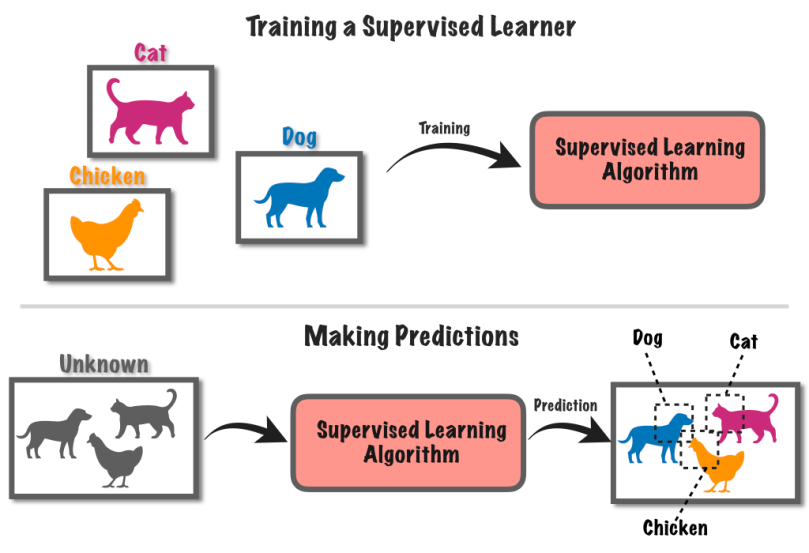

We use standard tools, such as train-test split functions, to divide the dataset:

In [4]:
from sklearn.model_selection import train_test_split
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42, 1) (21, 1) (42,) (21,)


# 1.2 ML model

We need to choose some class of functions $F$ for our predictions. https://scikit-learn.org is the famous zoo (or rather a graveyard 🙂) of basic ML models. As a benchmark, one could always try:

*   **[Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** for regression problems

*   **[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** for classification models



In [5]:
from sklearn.linear_model import LinearRegression
# Use fit_intercept=False for centered data
reg =  LinearRegression()

# 1.3 Loss function

What is a good prediction? In practice we minimize some **loss function** $$\theta_0 = \arg\min_{\theta} L(F_{\theta}(x), y).$$


*   Standard **Linear Regression** minimizes [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html): $$ \text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$

*  The main loss for a **binary classification** is [LogLoss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html):  $$L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p)).$$ Here the  label $y \in \left\{0, 1\right\}$ and $p = \operatorname{Pr}(y=1)$ is the probability estimate. Logloss is minimized by the standard **Logistic Regression**.

In [6]:
# MSE loss
from sklearn.metrics import mean_squared_error

#1.4 Let's cook (i.e. fit-predict 🙂)

The "fit step" is a one-liner:

In [7]:
# fit the model
reg.fit(X_train, y_train)

LinearRegression()

The "predict step" is trivial, as always:

In [8]:
# predictions of the model
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

1454.9437901139772

We can take a look at **the coefficients and intercept**:

In [9]:
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [3.40592206]
Intercept: 19.14025265920688


And *visulaize the result*:

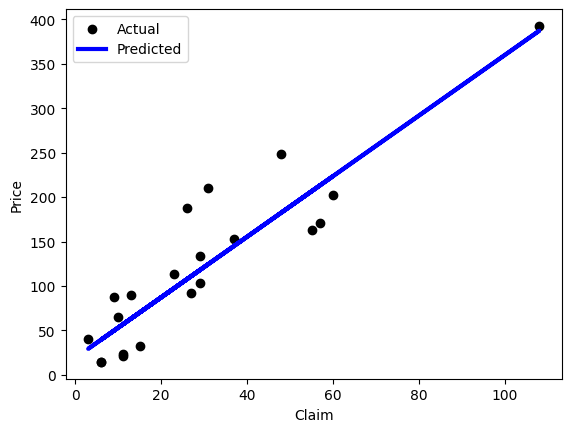

In [10]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted')
plt.xlabel('Claim')
plt.ylabel('Price')
plt.legend()
plt.show()

#2. **Stochastic gradient descent (SGD)**

In this section, you'll write your own linear model class to better understand how SGD learning works. SGD was discussed on the Lectures.


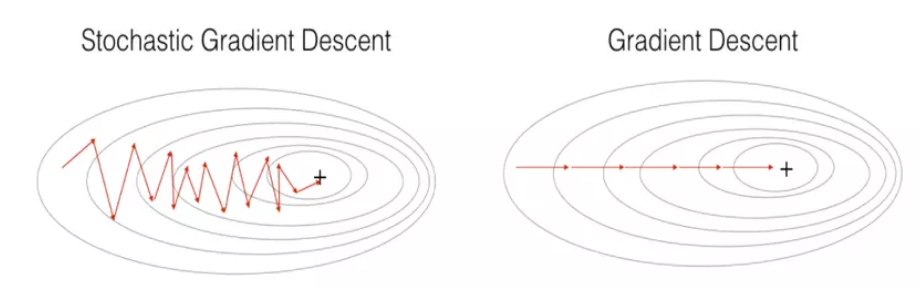


As it was shown
*   the complexity of the exact formula is $O(ND^2 + D^3)$,
*   whereas the complexity of SGD is $O(NDE)$.

Thus, SGD is more effective. We want to implement the following algorithm:


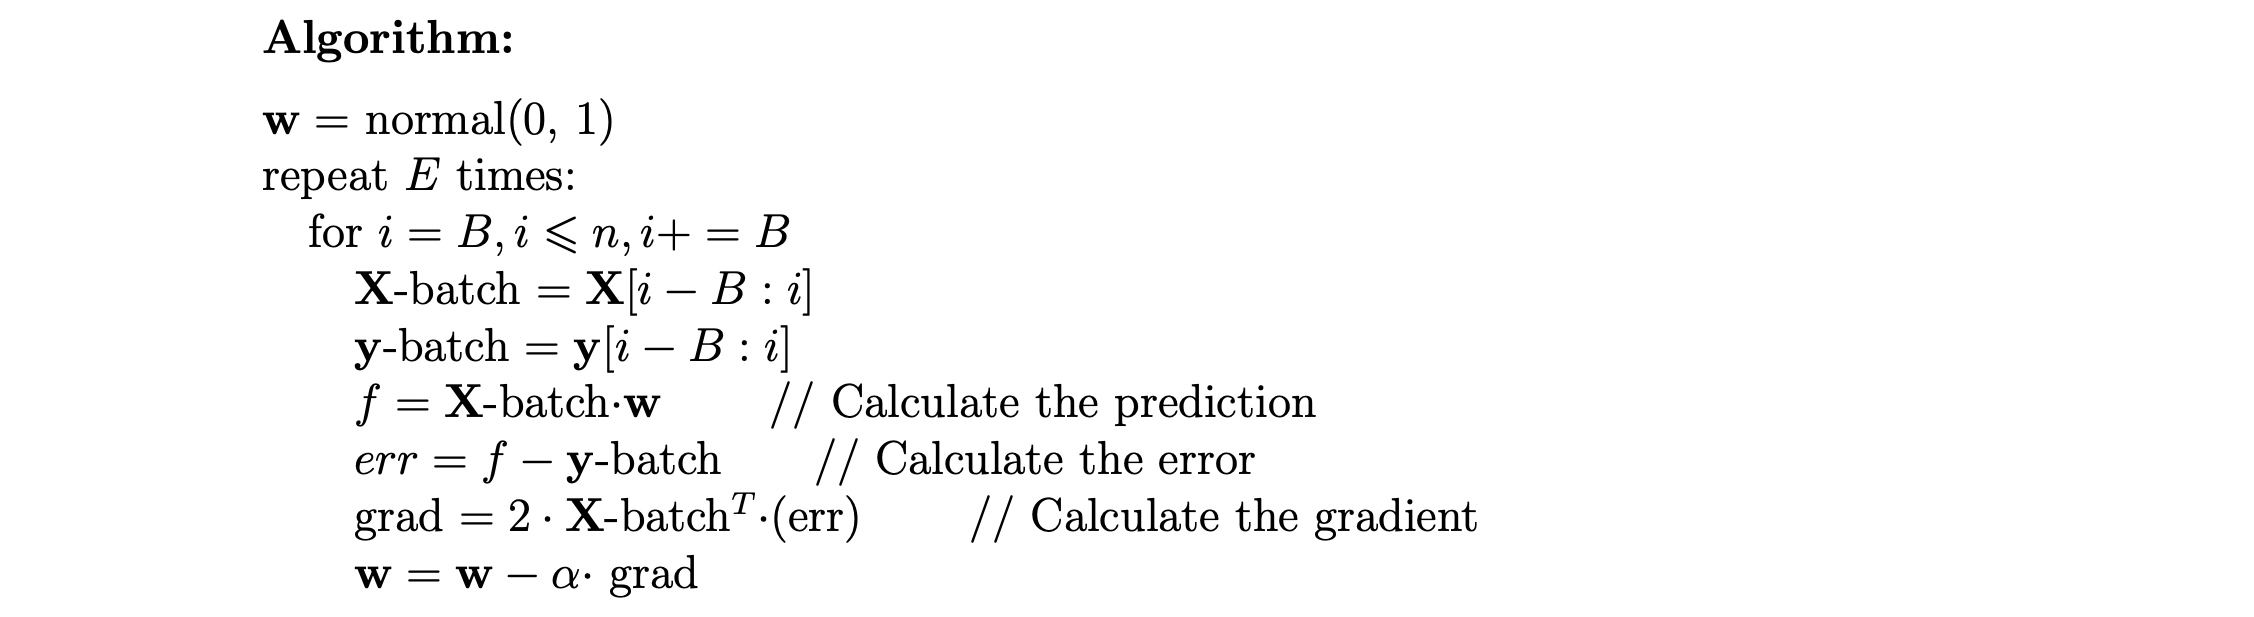

## 2.1 Intercept = Bias term (3 points)

In Linear Regression, the model approximates the relationship between the input features and the target variable using an **affine function**, which includes both linear and constant terms: $$ f_{\mathbf{w}, b}(x_i) = \langle \mathbf{w}, x_i\rangle  + b, \qquad x_i, \mathbf{w} \in \mathbb{R}^{D}, \quad b \in \mathbb{R}.$$  
This constant term $b$ is called an **intercept** or a **bias term**.


<font color='blue'>**Your task**</font>:

*   **Update the algorithm** for Linear Regression by including the intercept (=bias term) $b$.

The loss functions has the form $$L = \sum_{i=1}^N \left\| f_{\mathbf{w}, b}(x_i)- y_i \right\|^2 =  \left\| X \mathbf{w} + \mathbf{b} - \mathbf{y} \right\|^2.$$  **Write here** the formulas how to update the liner terms $\mathbf{w}$: $$\mathbf{w} = \mathbf{w} - \alpha \cdot \nabla_{\mathbf{w}} L, \qquad \nabla_{\mathbf{w}} L = 2X^T(Xw + b - y).$$  **Write here** the formulas how to update the bias term $b$: $$b = b - \alpha \cdot \nabla_b L, \qquad \nabla_b L = 2∗(Xw+b−y) $$

YOUR TEXT HERE

You don't have to rewrite the whole algorithm. *Just write the correct formulas for $\nabla_{\mathbf{w}} L$ and  $\nabla_b L$*.




In [11]:
# Write your answer in a Markdown cell above

## 2.2 Realization of SGD (5 points)


<font color='blue'>**Your task**</font>:

*   **Complete the code** in the block below.

Several remarks:

* For simplicity, we initalize the intercept as zero: $$b_0 = 0$$
* Recall that we use the following approximation: $$\nabla_W L(w, X, y) \approx \frac{1}{B} \sum_{i=1}^B \nabla_W L(w, X_{t_i}, y_{t_i})$$
Don't forget to <font color='blue'>  divide the gradient by B</font>! The coeffitient $\alpha$ in the algorithm above and the learning rate $\operatorname{lr}$ in the code below are related by the formula: $$\alpha = \frac{\operatorname{lr}}{\color{red} B}.$$  


In [12]:
from sklearn.base import RegressorMixin
import numpy as np


class SGDLinearRegressor(RegressorMixin):
    def __init__(
        self,
        lr=0.01,
        max_steps=1000,
        batch_size=64,
    ):
        self.lr = lr # learning rate = alpha * B
        self.max_steps = max_steps # that is E
        self.batch_size = batch_size # that is B

        self.W = None
        self.b = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        np.random.seed(seed)
        self.W = np.random.randn(n_features)
        self.b = 0.0

        # SGD optimization loop
        for step in range(self.max_steps):
            # Shuffle the data (optional)
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]

            # Iterate over mini-batches
            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:min(i + self.batch_size, n_samples)]
                Y_batch = Y_shuffled[i:min(i + self.batch_size, n_samples)]


                # Compute gradients
                gradients_W, gradient_b = self.compute_gradients(X_batch, Y_batch)

                # don't forget the intercept !

                # Update weights and bias
                self.W -= self.lr * gradients_W
                self.b -= self.lr * gradient_b

        return self

    def predict(self, X):
        return np.dot(X, self.W) + self.b

    def compute_gradients(self, X_batch, Y_batch):
        errors = np.dot(X_batch, self.W) + self.b - Y_batch
        gradients_W = 2 * np.dot(X_batch.T, errors) / X_batch.shape[0]
        gradient_b = 2 * np.mean(errors)
        return gradients_W, gradient_b

When implementing SGD, avoid iterating over the batch directly; instead, perform matrix multiplication.

##2.1 Apply SGD

Here we just check that our SGD works on a simple dataset. Just run all the cells.

In [13]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

We use a standard dataset

In [14]:
# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = \
  train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)
print(diabetes_X_train.shape, diabetes_X_test.shape,
      diabetes_y_train.shape, diabetes_y_test.shape)
# Always scale the input.
scaler = preprocessing.StandardScaler()
scaler.fit_transform(diabetes_X_train)
diabetes_x_test=scaler.transform(diabetes_X_test)

(353, 10) (89, 10) (353,) (89,)


The following code should work:

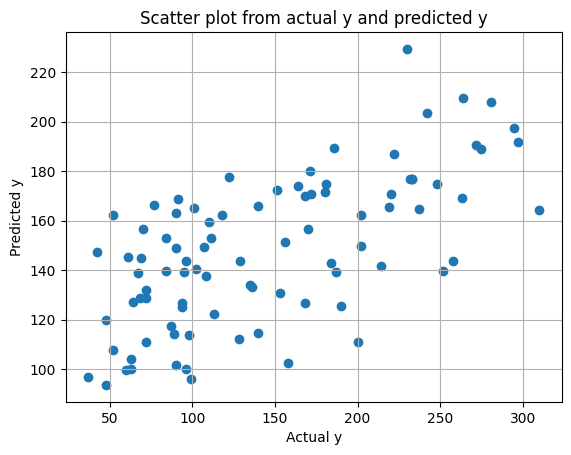

Mean Squared Error : 3372.761052521259


In [15]:
def predict_diabetes(model):
    model.fit(diabetes_X_train, diabetes_y_train)
    y_pred_sksgd=model.predict(diabetes_X_test)
    plt.scatter(diabetes_y_test,y_pred_sksgd)
    plt.grid()
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Scatter plot from actual y and predicted y')
    plt.show()
    print('Mean Squared Error :',mean_squared_error(diabetes_y_test, y_pred_sksgd))

our_clf_ = SGDLinearRegressor()
predict_diabetes(our_clf_)

#3. **Probability calibration**

Now, let's talk a little bit about Classification (and Logistic Regression). Here discuss only the Binary Classification, i.e. there are only two classes: $y_i = 0$ or $1$.


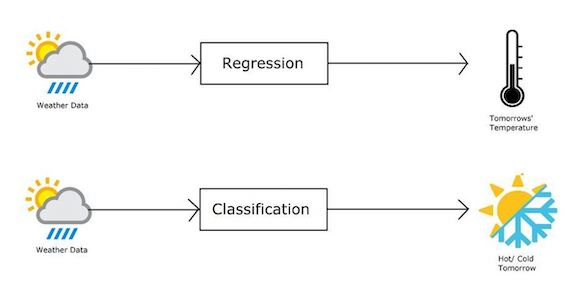

Usually in classification we predict the label $y_i$ by predicting the associated **probability** $\hat{p}_i = \operatorname{Pr}(y_i = 1)$. In this Section we study the following $2$ questions:

1. *Are we confident enough in our predictions*?
2. *If not, how can we improve them*?

To answer the first question we construct a <font color='red'>**calibration curve**</font>. Here is the idea behind it. Imagine you have a friend who's predicting whether it will rain.

* Ideally, if they predict a 70% chance of rain, it would rain on approximately 70% of those days. In practice, probabilities are not exact. So, we create different groups or "**bins**" $B_i$ for different levels of confidence, like 60-70%, 70-80%, and so on.
* For each bin $B_i$ we calculate the **mean predicted probability** (=our probability estimate) $m_i$ and the **fraction of positives** (=observed frequency) $\operatorname{frac}_i$.
* The **calibration curve** is the curve that passes through the points $(m_i, \operatorname{frac}_i)$.

Ideally, $m_i \approx \operatorname{frac}_i$. So we wish the calibration curve to be "as close to" the identity line from (0, 0) to (1, 1) as possible. Here is how the calibration curve can look if the classifier is <font color='red'>overconfident</font> or <font color='red'>underconfident</font> (not all classifiers are like that):



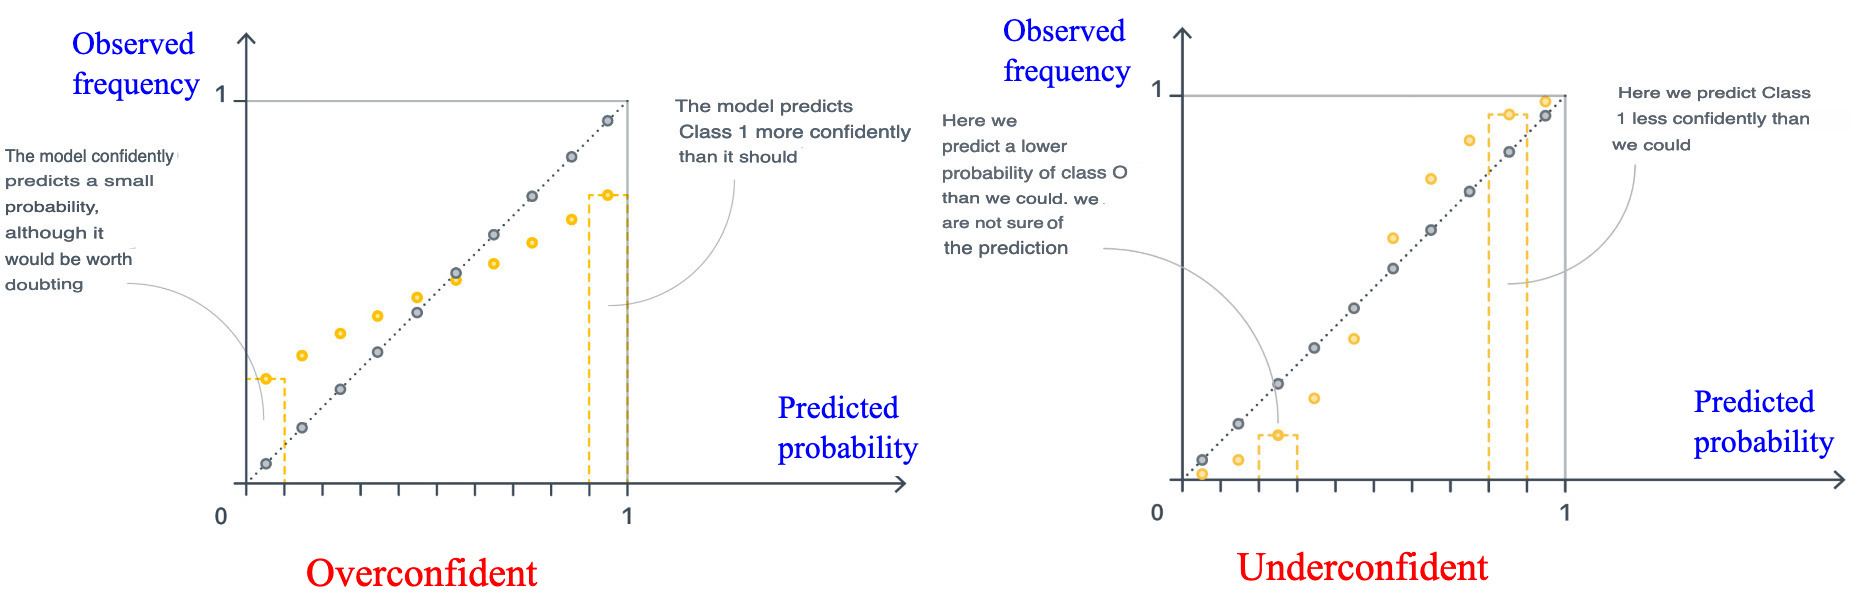

Let's see how it looks in practice.

## 3.1 Calibration curve (3 points)



Let's construct a calibration curve! First, we construct some synthetic data.

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
)

train_samples = 100  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle=False,
    test_size=100_000 - train_samples,
)

We take [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) as a Classifier. We fit it and get its predictions

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Create and fit a classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Get predicted probabilities for the positive class
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]
# Get predictions
rf_predictions = rf_classifier.predict(X_test)

<font color='red'>**Your task**</font>:

1. Split the data into $N = 10$ **bins**: $$B_i = \left\{x \quad | \quad \hat{p}(x) \in \left[\frac{i}{N}, \frac{i+1}{N} \right] \right\}$$

2. For each bin $B_i$ calculate the **mean predicted probability** $$\operatorname{m}_i = \frac{1}{\left|B_i \right|} \sum_{x \in B_i} \hat{p}(x),$$ and the **fraction of positives**: $$\operatorname{frac}_i = \frac{1}{\left|B_i \right|} \sum_{x \in B_i} y(x).$$

In [18]:
# Split predicted probabilities into bins
num_bins = 10
bins = np.linspace(0, 1, num_bins + 1)
bin_indices = np.digitize(rf_probabilities, bins)

# Calculate mean predicted probability and fraction of positives for each bin
mean_predicted_prob = np.zeros(num_bins)
fraction_positives = np.zeros(num_bins)


# Calculate mean predicted probability and fraction of positives for each bin
mean_predicted_prob = np.zeros(num_bins)
fraction_positives = np.zeros(num_bins)

for i in range(1, num_bins + 1):
    indices_in_bin = np.where(bin_indices == i)[0]
    mean_predicted_prob[i - 1] = np.mean(rf_probabilities[indices_in_bin])
    fraction_positives[i - 1] = np.mean(y_test[indices_in_bin])


Here is the calibration curve:

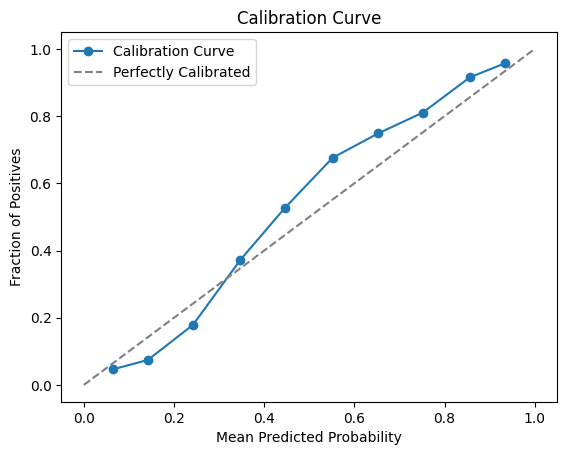

In [19]:
plt.plot(mean_predicted_prob, fraction_positives, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

Let's create a probability **histogram** to visualize the model's confidence in its predictions.

1. In the histogram, we group the predicted probabilities into **bins**, such as 0%-5%, 5%-10%, and so on.

2. Each bar in the histogram represents one of these bins, showing for how many objects the predicted probabilities fall in this range (**frequency of predictions**). The height of the bars indicates how often the model assigned probabilities within each bin.



This visual representation helps us understand if the model is calibrated and if its predicted probabilities align well with the actual outcomes.

*   Note: observe if there are peaks at 0 and 1, or if they are closer to 0.1 and 0.9?


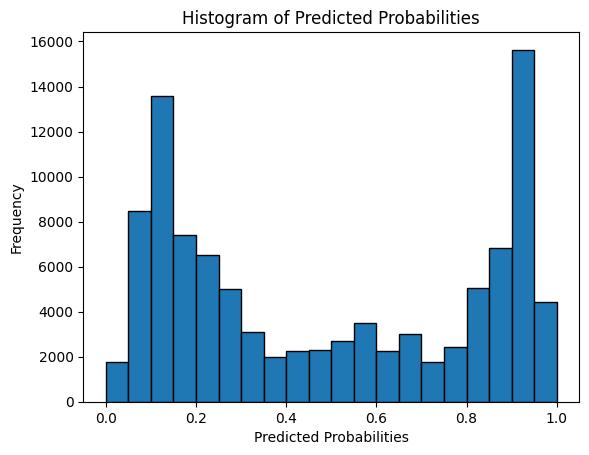

In [20]:
# Plot histogram
plt.hist(rf_probabilities, bins=20, edgecolor='black')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

### 3.1.1 Histogram Insights (optional)

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) operates on the principle of bagging, attempting to amalgamate the 'average opinion' of multiple ML models (Decision Trees in the Forest).

*   **Question**: Will Random Forests frequently exhibit confidence levels of 0% or 100%?
*   **Answer**: Not often. In such cases, each tree must be nearly 0% or 100% certain, which is unlikely due to calculation errors, dispersion, etc.


Just as in real life, having too many expert opinions may lead to 'analysis paralysis.'

## 3.2 **Sigmoid/ Platt’s calibration** (7 points)

There are various techniques for the calibraion of probabilities https://scikit-learn.org/stable/modules/calibration.html. In this section we're going to realize the [sigmoid method](https://scikit-learn.org/stable/modules/calibration.html#sigmoid), which is one of the simpliest.

We aim to refine our predicted probabilities $\hat{p}_i$ to closely align them with the actual outcomes. Let's apply some function to the predictions: $$\hat{p}_i \to f(\hat{p}_i).$$ Which function $f(z)$ should we use? The values of $f(z)$ must lie within the 0 to 1 range and exhibit increasing behavior. The <font color='red'>sigmoid function</font>, denoted as $\sigma(z)$, fits these criteria perfectly, making it an ideal choice for enhancing the calibration of our predictions.

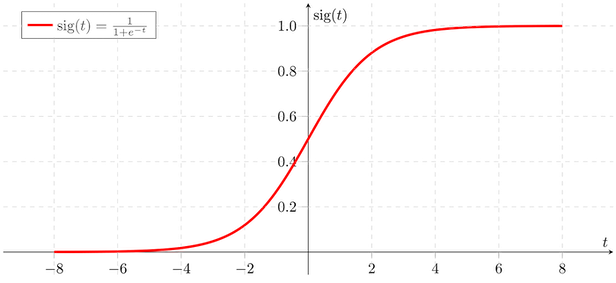


Hm, where have we heard about the sigmoid before? 🤔 That's right! In the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)!

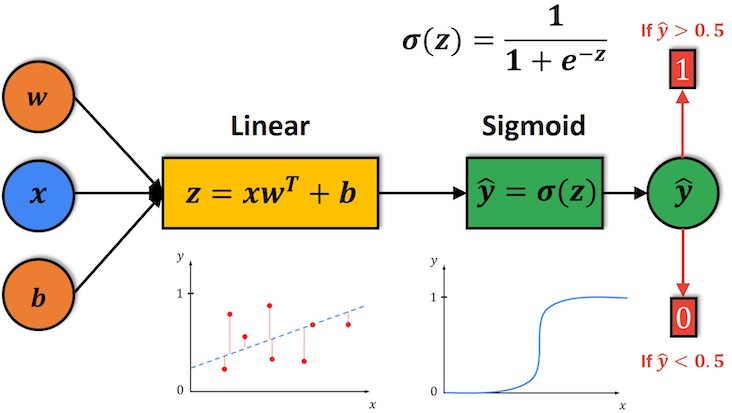

The sigmoid method assumes the calibration curve can be corrected by applying a sigmoid function to the raw predictions. This assumption has been empirically justified in the case of Support Vector Machines by [J. Platt, (1999)](https://www.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf) but *does not necessarily hold in general*.

### 3.2.1 **Your Task**

Your objective is to realize the [sigmoid method](https://scikit-learn.org/stable/modules/calibration.html#sigmoid). Since we are predicting probabilities, it makes sense to use [LogLoss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html), which is a loss function designed for probabilities: $$L = \sum_{i=1}^N \left( -y_i \log(q_i) - (1-y_i) \log(1-q_i)\right),$$ Here, if $\hat{p}(x_i)$ is the predicted probability, then  $$q_i = \frac{1}{1 + \exp\left(A \cdot \hat{p}(x_i) + B\right)}.$$ Your task is to **calculate the parameters $A$ and $B$ using gradient decent**. That is, we update them by the formulars $$A_{new} = A_{old} - \eta \cdot \frac{\partial L}{\partial A}, \qquad B_{new} = B_{old} - \eta \cdot \frac{\partial L}{\partial B},$$ where $\eta$ is the learning rate. In accordance with the original paper [J. Platt, (1999)](https://www.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf), we do the following:

*   Let $N_{0}$ be the number of negative examples (i.e. class =0)  and $N_{1}$ be the number of positive examples (i.e. class =1).
* <font color='red'>Starting values</font> of $A$ and $B$: $$A = 0, \qquad B = \log\left(\frac{N_{0} + 1}{N_{1} + 1} \right)$$
*  Replace the labels $y_i$ and $(1-y_i)$ with regularized <font color='red'>target probability</font>: $$t_{0} = \frac{1}{N_{0} + 2}, \qquad t_{+} = \frac{N_{1} + 1}{N_{1} + 2}.$$

In [21]:
class MySigmoidCalibration:
    def __init__(self, A=0, B=0, thr=0):
        self.A = A
        self.B = B
        self.thr = thr

    def predicted_value(self, x):
        return 1 / (1 + np.exp(self.A * x + self.B))

    def gradient_A(self, x, y):
        return  (y - self.predicted_value(x)) * x

    def gradient_B(self, x, y):
        return y - self.predicted_value(x)

    def fit(self, x_train, y_train, lr=0.001, epochs=10):
        # Find the number of positive and negative examples
        prior0 = np.sum(1 - y_train)
        prior1 = np.sum(y_train)

        # Initialize A and B
        self.A = 0
        self.B = np.log((prior0 + 1)/(prior1 + 1))

        # Make an array with target probabilites
        t=[]
        for i in y_train:
          if i == 0:
            t.append(1 / (prior0 + 2))
          else:
            t.append((prior1 + 1)/(prior1 + 2))

        for epoch in range(epochs):
            for x, y in zip(x_train, t):
                self.A -= lr * self.gradient_A(x, y)
                self.B -= lr * self.gradient_B(x, y)

    def predict_proba(self, x_test):
        probabilities = np.array([[1 - self.predicted_value(x), self.predicted_value(x)] for x in x_test])
        return probabilities

    def predict(self, x_test):
        probabilities = self.predict_proba(x_test)[:, 1]
        predicted_classes = (probabilities >= self.thr).astype(int)
        return predicted_classes

## 3.2.2 Calibration curves

Just run the cells and draw the calibration curves.

In [22]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

Calibration of probabilities. (Note: it's better not to performed it on the train set, but rather on another **validation set**).

In [23]:
calibrated_clf = MySigmoidCalibration()
calibrated_clf.fit(rf_probabilities, y_test)
calibrated_probabilities = calibrated_clf.predict_proba(rf_probabilities)[:, 1]
calibrated_classes = calibrated_clf.predict(rf_probabilities)

Visualization of calibration curves

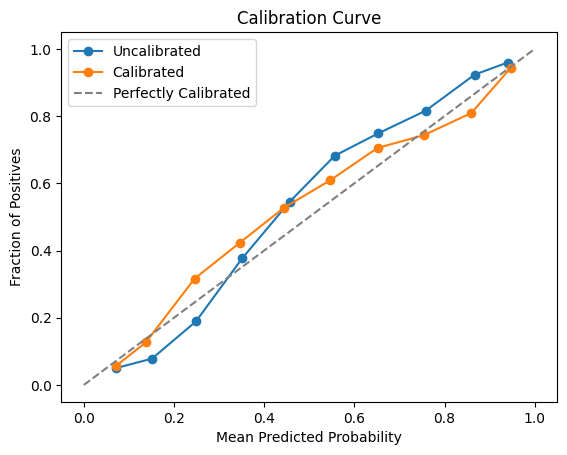

In [24]:
prob_true, prob_pred = calibration_curve(y_test, rf_probabilities, n_bins=10)
calibrated_true, calibrated_pred = calibration_curve(y_test, calibrated_probabilities, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Uncalibrated')
plt.plot(calibrated_pred, calibrated_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

Histograms

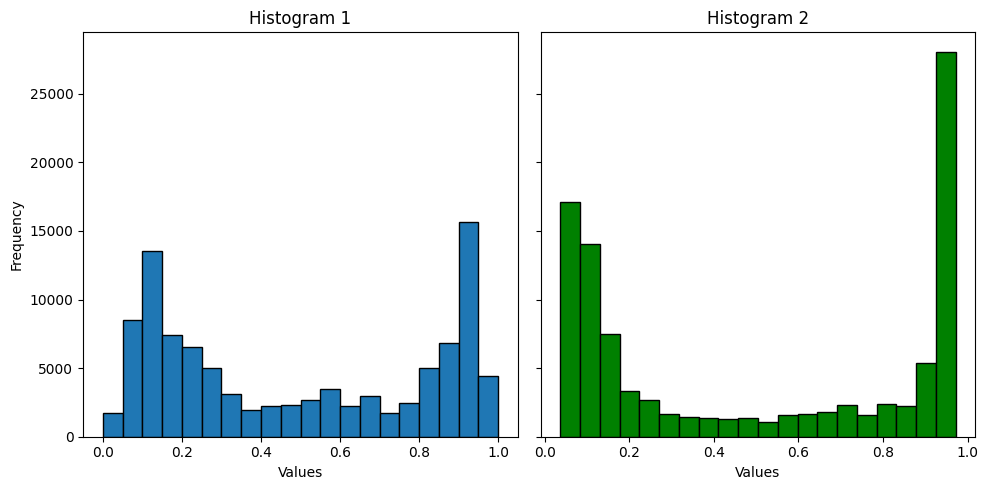

In [25]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot histogram for data1
axs[0].hist(rf_probabilities, bins=20, edgecolor='black')
axs[0].set_title('Histogram 1')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for data2
axs[1].hist(calibrated_probabilities, bins=20, edgecolor='black', color='green')
axs[1].set_title('Histogram 2')
axs[1].set_xlabel('Values')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Maybe you'll manage to make a certain RandomForest more confident in its answers)